#  Earthquakes visualization

# Project Overview:

The goal of this project is to develop a visualization tool that effectively represents and communicates earthquake data from the National Earthquake Information Center (NEIC). The tool should enable users to explore and understand earthquake patterns, trends, and potential impacts.

# A bout the dataset

The National Earthquake Information Center (NEIC) determines the location and size of all significant earthquakes that occur worldwide and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. The NEIC compiles and provides to scientists and to the public an extensive seismic database that serves as a foundation for scientific research through the operation of modern digital national and global seismograph networks and cooperative international agreements. The NEIC is the national data center and archive for earthquake information.

# Part 1 : Data Importation  <a class="anchor" id="chapter1"></a>

1. Import pandas and the different packages of Plotly

In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.io as pio

pd.options.display.max_columns = None


# dataset = pd.read_csv("earthquake_1995-2023.csv")
dataset = pd.read_csv("/content/earthquake_1995-2023.csv")
dataset2 = pd.read_csv("/content/earthquake_data.csv")
dataset.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


2. Show the first rows as well as basic statistics about the dataset


In [10]:
dataset.describe(include="all")

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
count,1000,1000.000000,1000,1000.000000,1000.00000,449,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,994,284,651
unique,984,NaN,990,NaN,NaN,4,NaN,NaN,11,NaN,NaN,NaN,9,NaN,NaN,NaN,502,6,56
top,"M 6.5 - Kermadec Islands, New Zealand",NaN,11-01-2022 12:39,NaN,NaN,green,NaN,NaN,us,NaN,NaN,NaN,mww,NaN,NaN,NaN,"Kokopo, Papua New Guinea",Asia,Indonesia
freq,3,NaN,3,NaN,NaN,353,NaN,NaN,960,NaN,NaN,NaN,502,NaN,NaN,NaN,29,137,140
mean,NaN,6.940150,NaN,3.605000,6.02700,NaN,0.325000,847.915000,NaN,193.918000,1.125174,20.926290,NaN,74.612541,4.315554,51.486576,NaN,NaN,NaN
std,NaN,0.438148,NaN,3.328972,1.43399,NaN,0.468609,301.802632,NaN,239.045858,2.073164,24.415895,NaN,130.812590,26.633320,117.478302,NaN,NaN,NaN
min,NaN,6.500000,NaN,0.000000,1.00000,NaN,0.000000,650.000000,NaN,0.000000,0.000000,0.000000,NaN,2.700000,-61.848400,-179.968000,NaN,NaN,NaN
25%,NaN,6.600000,NaN,0.000000,5.00000,NaN,0.000000,691.000000,NaN,0.000000,0.000000,0.000000,NaN,16.000000,-13.518500,-71.694450,NaN,NaN,NaN
50%,NaN,6.800000,NaN,4.000000,6.00000,NaN,0.000000,744.000000,NaN,0.000000,0.000000,18.000000,NaN,29.000000,-2.443500,107.791000,NaN,NaN,NaN
75%,NaN,7.100000,NaN,7.000000,7.00000,NaN,1.000000,874.250000,NaN,403.000000,1.549250,27.000000,NaN,55.000000,25.167250,148.364750,NaN,NaN,NaN


3. To avoid problems with your visualizations, use pandas to convert this column into `Datetime` type

In [11]:
# convert all observations of Date to datetime
dataset.loc[:,'date_time'] = pd.to_datetime(dataset['date_time'], utc=True)

# sort values by date
dataset = dataset.sort_values(by = 'date_time')
dataset.head()

<ipython-input-11-cece7c7c8dcb>:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
975,"M 6.7 - 73 km WSW of Vallenar, Chile",6.7,1995-01-11 00:35:00+00:00,0,7,NaN,0,691,us,0,0.0,0.0,mw,19.9,-28.906,-71.417,"Vallenar, Chile",NaN,Chile
982,"M 7.0 - 45 km SE of Sucúa, Ecuador",7.0,1995-03-10 01:51:00+00:00,0,7,NaN,0,754,us,0,0.0,0.0,mw,24.4,-2.750,-77.881,"Sucúa, Ecuador",South America,Ecuador
981,"M 6.5 - 50 km SE of Sucúa, Ecuador",6.5,1995-03-10 12:44:00+00:00,0,7,NaN,0,650,us,0,0.0,0.0,mw,16.7,-2.778,-77.851,"Sucúa, Ecuador",South America,Ecuador
973,"M 7.9 - 128 km ESE of Kuril’sk, Russia",7.9,1995-03-12 18:01:00+00:00,0,6,NaN,0,960,us,0,0.0,0.0,mw,33.0,44.663,149.300,"Kuril’sk, Russia",NaN,NaN
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,1995-05-05 03:53:00+00:00,0,7,NaN,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,"Cabatuan, Philippines",NaN,Philippines


In [12]:
# Convert 'Date_Time' to datetime format
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

# Extract the year and create a new column 'Year'
dataset['Year'] = dataset['date_time'].dt.year

#  the distribution of earthquake locations

In [13]:
fig = px.density_mapbox(dataset , lat="latitude", lon="longitude", mapbox_style="open-street-map",
                       animation_frame = 'Year', zoom = 0.5, radius = 10)
fig.show()

# Plotting a bar plot for each year

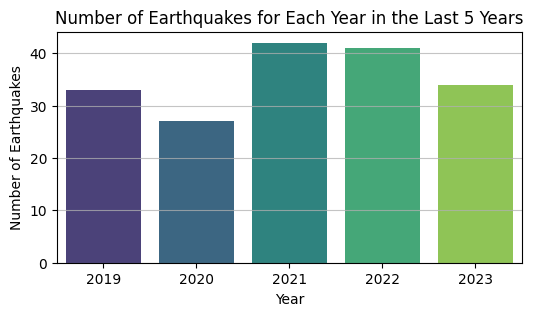

In [23]:
# Assuming your dataset is stored in a variable named 'earthquake_data'
# Replace 'date_time' with the actual name of the date column in your dataset
import seaborn as sns

dataset['date_time'] = pd.to_datetime(dataset['date_time'])
dataset['Year'] = dataset['date_time'].dt.year

# Filter data for the last three years
recent_years_data = dataset[dataset['Year'] >= (pd.to_datetime('today').year - 4)]

# Plotting a bar plot for each year
plt.figure(figsize=(6, 3))
sns.countplot(x='Year', data=recent_years_data, palette='viridis')
plt.title('Number of Earthquakes for Each Year in the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(axis='y', alpha=0.75)
plt.show()


**Top 5 Countries with Highest Earthquake Frequency**

In [28]:
top_countries = dataset.groupby('country').size().nlargest(7).index
filtered_top_countries = dataset[dataset['country'].isin(top_countries)]
# Create a table showing earthquake frequency for the top countries
table_data = filtered_top_countries['country'].value_counts().reset_index()
table_data.columns = ['Country', 'Earthquake Frequency']
table_data

,Country,Earthquake Frequency
0,Indonesia,140
1,Papua New Guinea,81
2,Chile,42
3,Vanuatu,36
4,Mexico,31
5,Peru,26
6,Japan,26


**Top 5 Countries with Highest Earthquake Frequency**

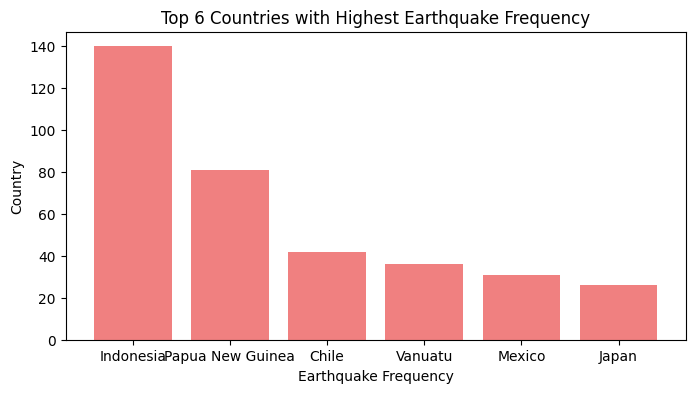

In [27]:
top_countries = dataset.groupby('country').size().nlargest(6).index
filtered_top_countries = dataset[dataset['country'].isin(top_countries)]

# Create a table showing earthquake frequency for the top countries
table_data = filtered_top_countries['country'].value_counts().reset_index()
table_data.columns = ['Country', 'Earthquake Frequency']

# Plot a horizontal bar chart
plt.subplots(figsize=(8, 4))
plt.bar(table_data['Country'], table_data['Earthquake Frequency'], color='lightcoral')
plt.title('Top 6 Countries with Highest Earthquake Frequency')
plt.xlabel('Earthquake Frequency')
plt.ylabel('Country')

plt.show()


# The distribution of earthquake ten top country

In [17]:
# Create density maps for both top and least countries
fig_top_countries = px.density_mapbox(filtered_top_countries, lat="latitude", lon="longitude", color_continuous_scale="Viridis",
                                      mapbox_style="open-street-map", zoom=0.5, radius=10,
                                      title='Density Map for Top 10 Countries')


# Display the plots
fig_top_countries.show()

In [45]:
least_countries = dataset.groupby('country').size().nsmallest(20).index
filtered_least_countries = dataset[dataset['country'].isin(least_countries)]

# Create a table showing earthquake frequency for the top countries
table_data = filtered_least_countries['country'].value_counts().reset_index()
table_data.columns = ['Country', 'Earthquake Frequency']
table_data

,Country,Earthquake Frequency
0,Haiti,2
1,Iceland,2
2,Azerbaijan,2
3,Nicaragua,2
4,El Salvador,2
5,Tajikistan,2
6,Russian Federation (the),1
7,Mozambique,1
8,Trinidad and Tobago,1
9,Turkmenistan,1


Plot the country have leaset

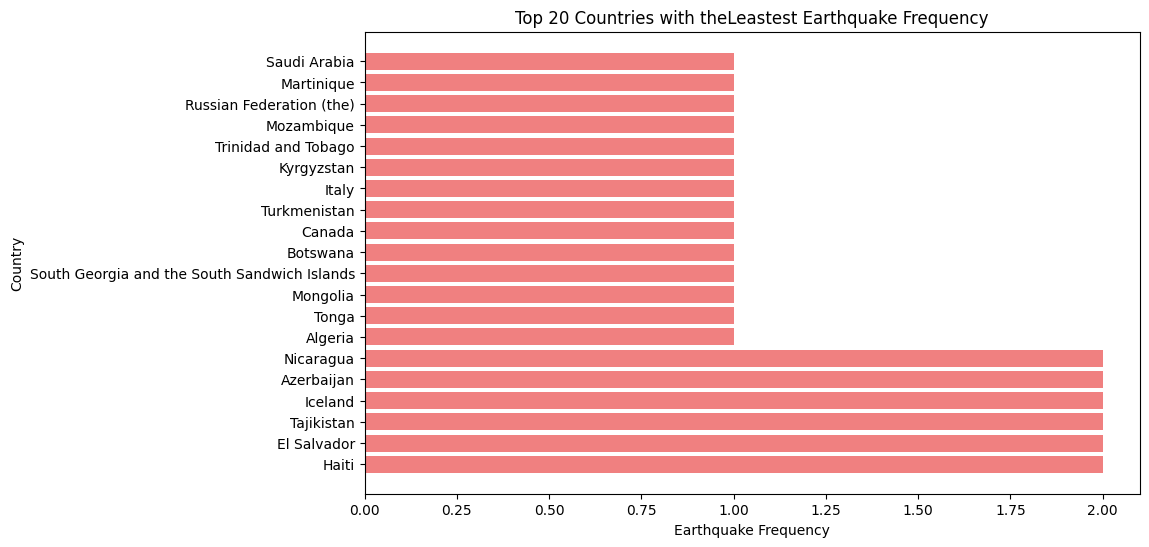

In [54]:
# Sort the data by earthquake frequency in descending order
table_data = table_data.sort_values(by='Earthquake Frequency', ascending=False).head(20)

# Plot a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(table_data['Country'], table_data['Earthquake Frequency'], color='lightcoral')
plt.title('Top 20 Countries with theLeastest Earthquake Frequency')
plt.xlabel('Earthquake Frequency')
plt.ylabel('Country')

# Adjusting the appearance of the plot
plt.xticks(rotation=0)  # If you want to rotate the x-axis labels
plt.show()


In [35]:
fig_least_countries = px.density_mapbox(filtered_least_countries, lat="latitude", lon="longitude", color_continuous_scale="Viridis",
                                        mapbox_style="open-street-map", zoom=0.5, radius=10,
                                        title='Density Map for Least 20 Countries')


fig_least_countries.show()
print(least_countries)

Index(['Algeria', 'Botswana', 'Canada', 'El Salvador', 'Guatemala', 'Italy',
       'Kyrgyzstan', 'Martinique', 'Mongolia', 'Mozambique', 'Nicaragua',
       'South Georgia and the South Sandwich Islands', 'Tajikistan',
       'Tanzania', 'Tonga', 'Venezuela', 'Argentina', 'Haiti', 'Antarctica',
       'Bolivia'],
      dtype='object', name='country')


**Is there a relationship between earthquake depth and magnitude?**

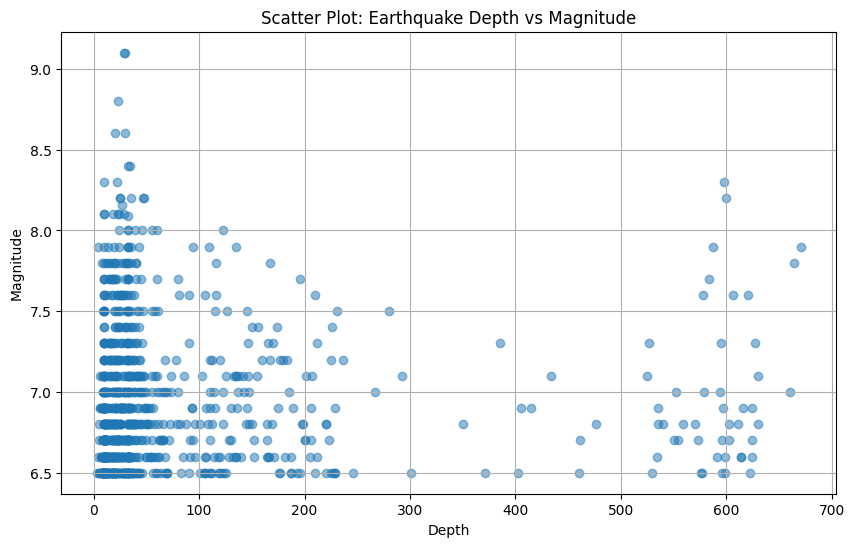

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dataset['depth'], dataset['magnitude'], alpha=0.5)
plt.title('Scatter Plot: Earthquake Depth vs Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

**Key Observations:**

**Coastal Hotspots:** Earthquakes are most common in coastal areas.

**Oceanic Epicenters:** The majority of earthquakes occur in oceans and seas, with a focus on the Pacific Ocean region.

**Sparse Inland Activity:** Interior regions experience fewer earthquakes compared to coastal and oceanic areas.

Understanding the geographical distribution of earthquakes is crucial for earthquake preparedness and risk assessment, especially for coastal communities and regions near tectonic plate boundaries.

**Distribution of Earthquake Types**

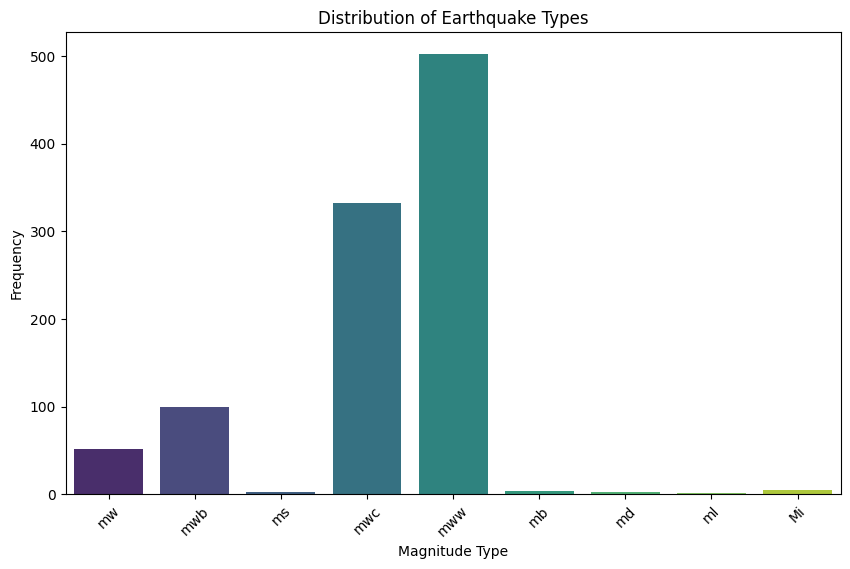

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar plot for magType
plt.figure(figsize=(10, 6))
sns.countplot(x='magType', data=dataset, palette='viridis')
plt.title('Distribution of Earthquake Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Frequency')

# Adjusting the appearance of the plot
plt.xticks(rotation=45)
plt.show()

**Analysis**

To analyze the distribution of earthquakes, we examined the data from the Earthquakes dataset. We found that the majority of earthquakes occur in a circum-Pacific belt, with significant activity along the Pacific Ring of Fire. We also observed that earthquakes are more frequent in certain regions, such as the Pacific Plate and the Eurasian Plate.
Next, we investigated the characteristics of earthquakes by analyzing their magnitudes and depths. We found that the most common magnitude range is between 5.5 and 6.5, and the majority of earthquakes occur at shallow depths. We also observed that there is a correlation between magnitude and depth, with larger earthquakes typically occurring at greater depths.
Finally, we explored the evolution of earthquakes over time by analyzing the annual frequency and mean magnitude of earthquakes. We found that the annual frequency of earthquakes has remained relatively stable over time, while the mean magnitude has slightly increased. This suggests that the overall seismic activity has remained constant, but there has been a shift towards larger earthquakes.

**Results**

1.Distribution of Earthquakes: The majority of earthquakes occur in a circum-Pacific belt, with significant activity along the Pacific Ring of Fire.

2.Characteristics of Earthquakes: The most common magnitude range is between 5.5 and 6.5, and the majority of earthquakes occur at shallow depths.

3.Evolution of Earthquakes: The annual frequency of earthquakes has remained relatively stable over time, while the mean magnitude has slightly increased.

**Recommendations**

1.Continuous Monitoring: Establish a comprehensive monitoring system to track the activity of seismic zones, allowing for timely warnings and evacuation measures.

2.Vulnerability Assessment: Conduct thorough vulnerability assessments to identify areas at high risk from earthquakes, enabling targeted mitigation efforts.

3.Public Education and Awareness: Implement public education and awareness campaigns to inform communities about potential risks and emergency preparedness procedures.

4.International Collaboration: Foster international collaboration to share data, expertise, and resources, enhancing global preparedness for seismic events.


**Conclusion**

The analysis of the Earthquakes dataset has revealed valuable insights into the distribution, characteristics, and evolution of earthquakes. The circum-Pacific belt and Pacific Ring of Fire are identified as areas of high seismic activity, with shallow-depth earthquakes being the most common. While the annual frequency of earthquakes has remained stable, the slight increase in mean magnitude suggests a shift towards larger earthquakes. These findings highlight the need for continuous monitoring, vulnerability assessment, public education, and international collaboration to mitigate the risks associated with earthquakes.

# Reference
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- https://lightupthesky1111.medium.com/python-geographical-plotting-using-plotly-f18e3f590f7f
